<a href="https://colab.research.google.com/github/TaniaR078/Challange_1/blob/main/Hotel_booking_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ABOUT DATA
Data ini berisi 119390 hasil observasi di City Hotek dan Resort Hotel. Setiap observasi mewakili pemesanan hotel antara tanggal 1 Juli 2015 hingga 31 Agustus 2017, termasuk pemesanan yang efektif dan pemesanan yang dibatalkan.

## PROBLEM STATEMENT
Dalam beberapa tahun terakhir, baik CIty Hotel maupun Resort Hotel mengalami peningkatan pembatalan yang signifikan.  Akibatnya, kedua hotek tersebut menghadapi berbagai tantangan, seperti berkurangnya pendapatan dan kurang dimanfaatkan kamar hotel. Oleh karena itu, goals yang diinginkan mengurangi tingkat pembatalan, yanga akan meningkatkan efisiensi dalam menghasilkan pendapatan. analisis saat ini berfokus pada analisi pembatalan hotel dan faktor-faktor lain yang tidak berdampak langsung terhadap bisnis dan perolehan pendapatan tahunan.

## QUESTION
1. Hotel apa yang mengalami pembatalan reservasi paling tinggi?
2. Apa saja variabel yang mempengaruhi pembatalan reservasi hotel?
3. Bagaimana caranya agar pembatalan reservasi hotel menjadi lebih rendah/lebih baik?


## PERSIAPAN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('hotel_bookings.csv')

## Data Pre Processing

In [ ]:
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [ ]:
df.shape

(119390, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [ ]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   index                           119390 non-null  int64         
 1   hotel                           119390 non-null  object        
 2   is_canceled                     119390 non-null  int64         
 3   lead_time                       119390 non-null  int64         
 4   arrival_date_year               119390 non-null  int64         
 5   arrival_date_month              119390 non-null  object        
 6   arrival_date_week_number        119390 non-null  int64         
 7   arrival_date_day_of_month       119390 non-null  int64         
 8   stays_in_weekend_nights         119390 non-null  int64         
 9   stays_in_week_nights            119390 non-null  int64         
 10  adults                          119390 non-null  int64  

In [ ]:
df.isnull().sum()

,0
index,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0


In [ ]:
df.drop(['company', 'agent'], axis = 1, inplace = True)
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
index,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0


In [ ]:
df.describe()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,59872.784496,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-31 20:49:36.695991552
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,30185.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,59930.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,89663.750000,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-16 00:00:00
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-12-09 00:00:00
std,34418.708956,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [ ]:
df = df[df['adr'] < 5000]

In [ ]:
df.describe()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,59872.880022,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-31 20:51:35.775334912
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,30185.000000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,59931.000000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,89664.000000,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-16 00:00:00
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-12-09 00:00:00
std,34418.837937,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


## Exploratory Data analysis

In [ ]:
df.head(10)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07
5,5,Resort Hotel,0,14,2015,July,27,1,0,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07
6,6,Resort Hotel,0,0,2015,July,27,1,0,2,...,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-03-07
7,7,Resort Hotel,0,9,2015,July,27,1,0,2,...,C,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-03-07
8,8,Resort Hotel,1,85,2015,July,27,1,0,3,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-06-05
9,9,Resort Hotel,1,75,2015,July,27,1,0,3,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
cancelled_persen = df['is_canceled'].value_counts(normalize=True) * 100
print(cancelled_persen)


is_canceled
0    62.865337
1    37.134663
Name: proportion, dtype: float64


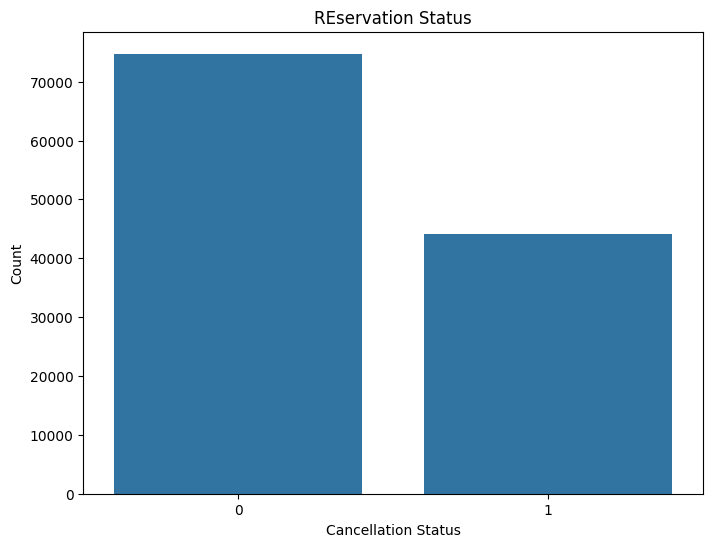

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_canceled', data=df)
plt.title('REservation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.show()

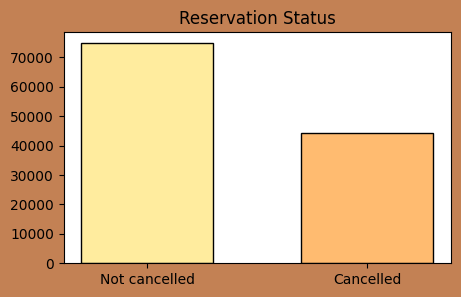

In [ ]:
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])

plt.figure(figsize = (5,3),facecolor="#C38154")
plt.title('Reservation Status')
plt.bar(['Not cancelled' , 'Cancelled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.6,color=colors)
plt.show()


Berdasarkan grafik diatas menyatakan bahwa sebanyak 37% klien memilih untuk membatalkan reservasi. Hal ini, berdampak besar pada pemdapatan hotel.

In [ ]:
# cek persentase cancel di Resort Hotel
resort_hotel = df[df['hotel'] == 'Resort Hotel']['is_canceled'].value_counts(normalize=True) * 100
print(resort_hotel)

is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64


In [ ]:
# cek persentase cancel di City Hotel
city_hotel = df[df['hotel'] == 'City Hotel']['is_canceled'].value_counts(normalize=True) * 100
print(city_hotel)

is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64


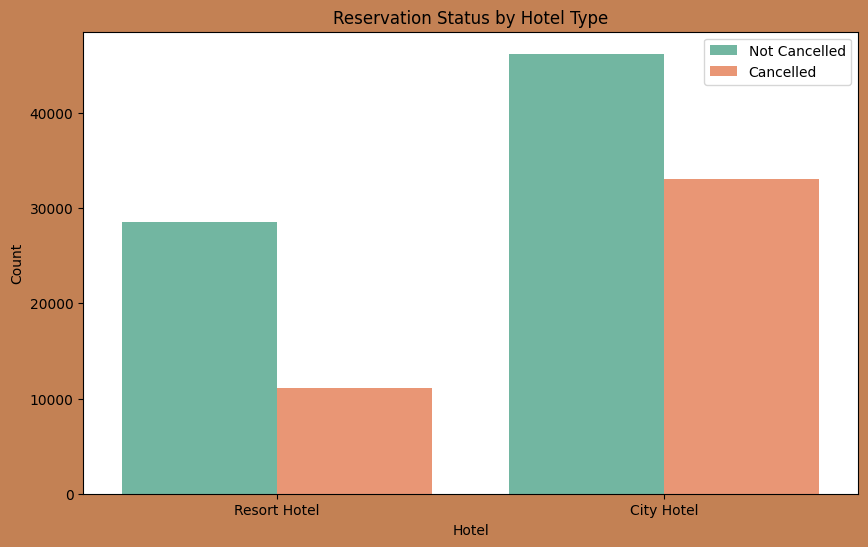

In [ ]:
# set the background color of the figure
plt.figure(figsize=(10, 6), facecolor="#C38154")

# Create the countplot
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df,
                    palette="Set2")

# Customize legend location
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

# set plot title and axis label
plt.title('Reservation Status by Hotel Type')
plt.xlabel('Hotel')
plt.ylabel('Count')

# Customize legent labels
plt.legend(labels=['Not Cancelled', 'Cancelled'])

# Show the plot
plt.show()

jika dibandingkan dengan resort hotel, city hotel memiliki pemesanan hotel lebih tinggi.

In [ ]:
# prompt: Mengelompokkan dan menghitung rata-rata 'adr' berdasarkan 'reservation_status_date' untuk Resort Hotel

# Filter data untuk Resort Hotel
resort_data = df[df['hotel'] == 'Resort Hotel']

# Kelompokkan data berdasarkan 'reservation_status_date' dan hitung rata-rata 'adr'
average_adr_resorthotel = resort_data.groupby('reservation_status_date')['adr'].mean()

print(average_adr_resorthotel)


reservation_status_date
2014-11-18      0.000000
2015-01-01     61.966667
2015-01-05    115.363333
2015-01-06    133.677143
2015-01-07     82.485455
                 ...    
2017-12-05    103.287534
2017-12-06    159.808929
2017-12-07    160.306275
2017-12-08    212.767222
2017-12-09    153.570000
Name: adr, Length: 913, dtype: float64


In [ ]:
city_data = df[df['hotel'] == 'City Hotel']
average_adr_cityhotel = city_data.groupby('reservation_status_date')['adr'].mean()
print(average_adr_cityhotel)

reservation_status_date
2014-10-17     62.800000
2015-01-01     62.063158
2015-01-05     58.900000
2015-01-06     69.216667
2015-01-07     82.877500
                 ...    
2017-12-04    128.755465
2017-12-05    124.544536
2017-12-06    132.725882
2017-12-07    130.473617
2017-12-08    142.949080
Name: adr, Length: 864, dtype: float64


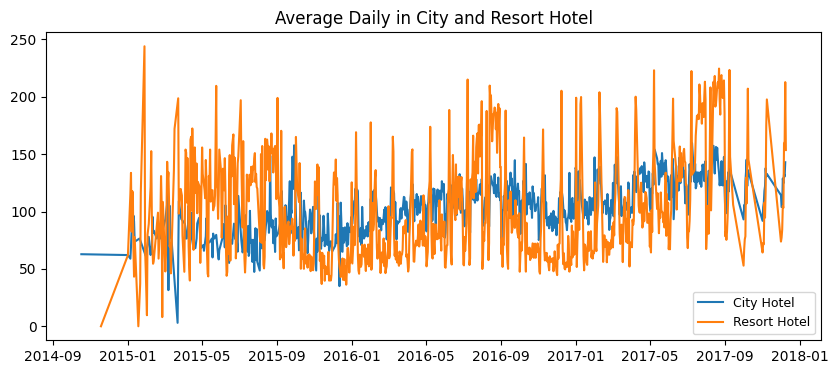

In [ ]:

plt.figure(figsize=(10, 4))
plt.plot(average_adr_cityhotel.index, average_adr_cityhotel.values, label='City Hotel')
plt.plot(average_adr_resorthotel.index, average_adr_resorthotel.values, label='Resort Hotel')
plt.title('Average Daily in City and Resort Hotel')
plt.legend(fontsize=9)
plt.show()


berdasarkan grafik line diatas, pada hari-hari tertentu rata-rata tarif di City hotel lebih rendah dibandingkan dengan resort hotel. Mungkin saja pada akhir pekan dan hari libur tarif resort hotel akan meningkat.

In [ ]:
df['month'] = df['reservation_status_date'].dt.month

In [ ]:
df.head(5)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,1
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,1
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07,3


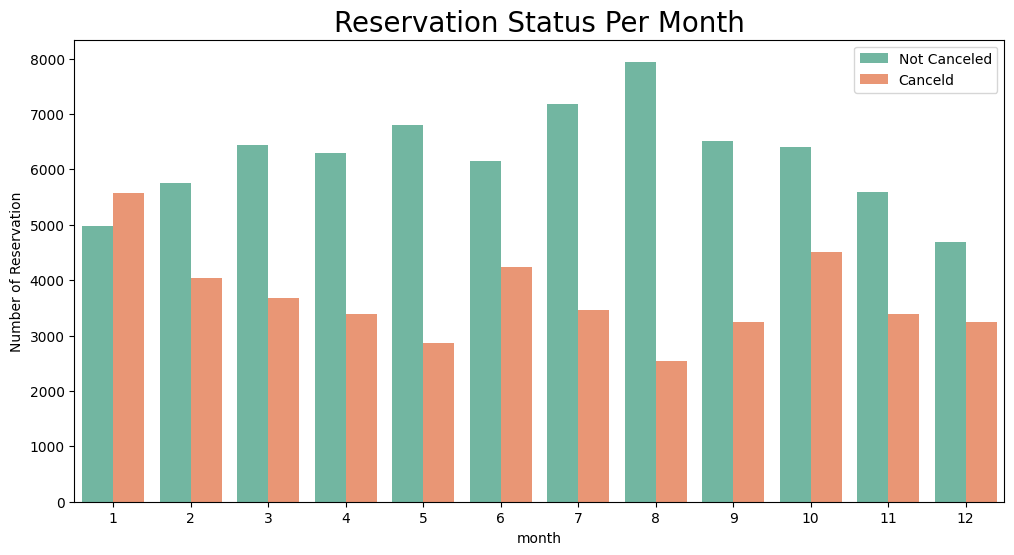

In [ ]:
plt.figure(figsize=(12,6))
ax1 = sns.countplot(x='month', hue='is_canceled', data= df, palette = 'Set2')
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Reservation Status Per Month', size = 20)
plt.xlabel('month')
plt.ylabel('Number of Reservation')
plt.legend(['Not Canceled','Canceld'])
plt.show()


Terlihat jelas pada City hotel dibulan Agustus dengan jumlah reservasi tertinggi tetapi canceled . sedangkan bulan januari memiliki jumlah reservasi sedikit tetapi jumlah cancel tertinggi.

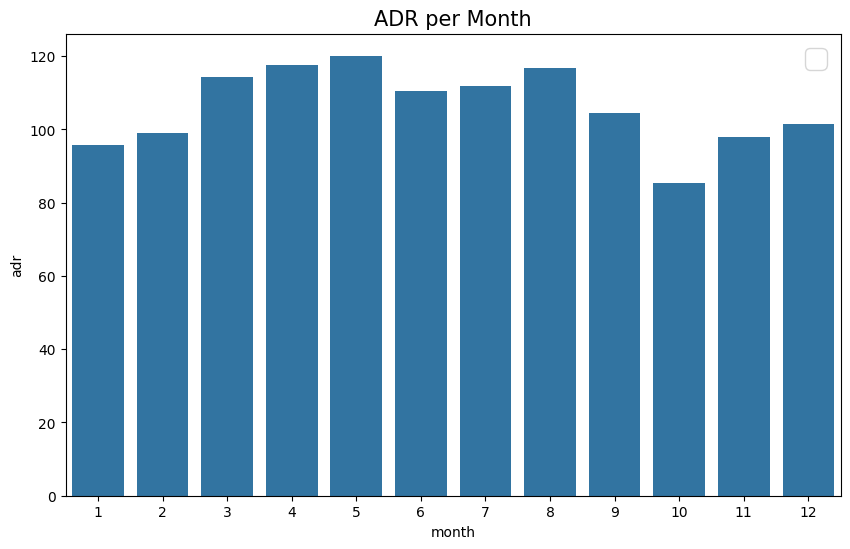

In [ ]:
plt.figure(figsize = (10,6))
plt.title('ADR per Month', fontsize = 15)
data = df[df['is_canceled'] == 1].groupby('month')['adr'].mean().reset_index()
sns.barplot(x='month', y='adr', data = data )
plt.legend(fontsize = 20)
plt.show()

pembatalan tertinggi terjadi pada bulan januari disebabkan oleh tingginya tarif hotel.


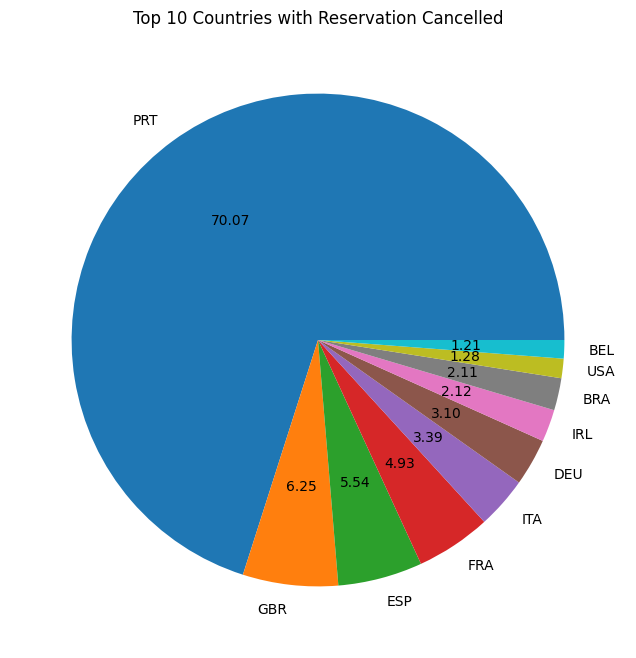

In [ ]:
cancaled_data =df[df['is_canceled']==1]
top_10_countries=cancaled_data['country'].value_counts()[:10]
plt.figure(figsize=(8, 8))
plt.title('Top 10 Countries with Reservation Cancelled')
plt.pie(top_10_countries, autopct='%.2f',labels=top_10_countries.index)
plt.show()

Negara Portugal merupakan negara tertinggi yang melakukan pembatalan reservasi.

In [ ]:
df['market_segment'].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.474377
Offline TA/TO,0.203193
Groups,0.166581
Direct,0.104696
Corporate,0.042987
Complementary,0.006173
Aviation,0.001993


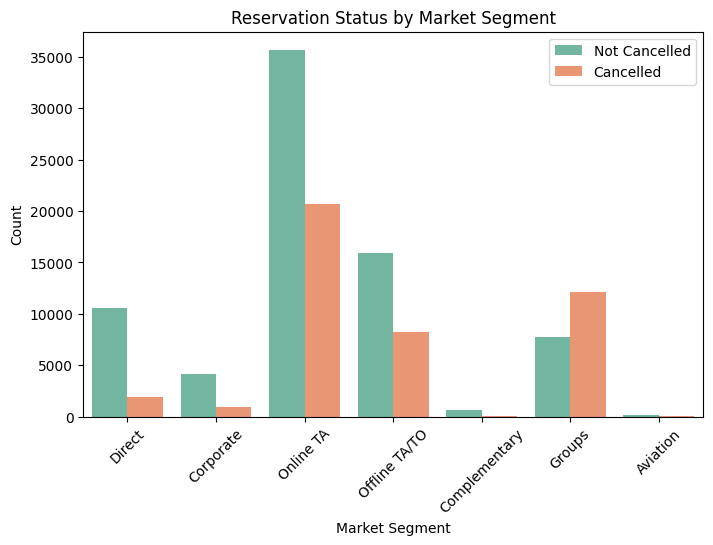

In [ ]:

plt.figure(figsize=(8, 5))
sns.countplot(x='market_segment', hue='is_canceled', data=df, palette='Set2')
plt.title('Reservation Status by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(labels=['Not Cancelled', 'Cancelled'])
plt.show()
